 https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb

## Business Understanding
This dataset was generated using statistics from the 2024 Joint Admissions and Matriculation Board (JAMB) examination to predict students performance. JAMB is a standardized test for university admissions in Nigeria. It aims to identify factors affecting student performance and support the development of targeted interventions to improve outcomes.

## Data Understanding

I assume everything was collected collected correctly and that there is no problem

In [10]:
%autosave 300

Autosaving every 300 seconds


In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 2- Data Preparation

### Load data

In [12]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [13]:
df= pd.read_csv('jamb_exam_results.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [15]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### Explore and Data

#### Preparing the dataset
First, let's make the names lowercase:  

`
df.columns = df.columns.str.lower().str.replace(' ', '_')  
`
Preparation:  

* Remove the student_id column.  
* Fill missing values with zeros.  
* Do train/validation/test split with 60%/20%/20% distribution.  
* Use the train_test_split function and set the random_state parameter to 1.  
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [17]:
df.head(1)

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2


### Transform and clean

In [18]:
df=df.drop(columns='student_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [19]:
# fill missing values
df.isnull().sum()  # 891
df.parent_education_level=df.parent_education_level.fillna(0)

In [20]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

###  Split

In [21]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train.head(1)

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,145,20,72,3,4.4,Public,Urban,No,Yes,Medium,Low,21,Female,Low,0,3


In [24]:
y_train = df_train.jamb_score
y_val = df_val.jamb_score
y_test = df_test.jamb_score

In [25]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

## Train

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.tree import export_text

In [27]:
dv=DictVectorizer(sparse=True)
dv

DictVectorizer()

In [28]:
train_dicts = df_train.to_dict(orient='records')
train_dicts[0]

{'study_hours_per_week': 20,
 'attendance_rate': 72,
 'teacher_quality': 3,
 'distance_to_school': 4.4,
 'school_type': 'Public',
 'school_location': 'Urban',
 'extra_tutorials': 'No',
 'access_to_learning_materials': 'Yes',
 'parent_involvement': 'Medium',
 'it_knowledge': 'Low',
 'age': 21,
 'gender': 'Female',
 'socioeconomic_status': 'Low',
 'parent_education_level': 0,
 'assignments_completed': 3}

In [29]:
X_train=dv.fit_transform(train_dicts)

In [30]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45000 stored elements and shape (3000, 29)>

## Modelling

#### Question 1  

Let's train a decision tree regressor to predict the jamb_score variable.  

Train a model with max_depth=1.  




In [31]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [32]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



Which feature is used for splitting the data?  
* study_hours_per_week
* attendance_rate
* teacher_quality
* distance_to_school

In [33]:
# study_hours_per_week

## Evaluation

#### Question 2

Train a random forest model with these parameters:  

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

In [34]:
rf=RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [35]:
#print(export_text(rf.estimators_[0], feature_names=list(dv.get_feature_names_out())))

In [36]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [37]:

predictions=rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
predictions[:5]

array([234.7, 145. , 195.2, 139.4, 196.8])

In [38]:
rmse

np.float64(42.13724207871227)

#### What's the RMSE of this model on validation?

* 22.13
* 42.13   -> answer
* 62.13
* 82.12

In [39]:
# closest 42.137

#### Question 3 
Now let's experiment with the n_estimators parameter  

Try different values of this parameter from 10 to 200 with step 10.  
Set random_state to 1.  
Evaluate the model on the validation dataset.  
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.  

* 10
* 25
* 80  <-answer
* 200

In [40]:
# 90 -> 80

In [41]:
for n in range(10,210, 10):
    rf=RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    print(rf)
    rf.fit(X_train, y_train)
    predictions=rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    print('%4s -> %0.3f'  %(n, rmse))

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)
  10 -> 42.137
RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=1)
  20 -> 41.461
RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=1)
  30 -> 41.106
RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=1)
  40 -> 40.917
RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=1)
  50 -> 40.852
RandomForestRegressor(n_estimators=60, n_jobs=-1, random_state=1)
  60 -> 40.784
RandomForestRegressor(n_estimators=70, n_jobs=-1, random_state=1)
  70 -> 40.677
RandomForestRegressor(n_estimators=80, n_jobs=-1, random_state=1)
  80 -> 40.539
RandomForestRegressor(n_estimators=90, n_jobs=-1, random_state=1)
  90 -> 40.504
RandomForestRegressor(n_jobs=-1, random_state=1)
 100 -> 40.517
RandomForestRegressor(n_estimators=110, n_jobs=-1, random_state=1)
 110 -> 40.593
RandomForestRegressor(n_estimators=120, n_jobs=-1, random_state=1)
 120 -> 40.625
RandomForestRegressor(n_estimators=130, n_j

#### Question 4
Let's select the best max_depth:  

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
* try different values of n_estimators from 10 till 200 (with step 10)
* calculate the mean RMSE
* Fix the random seed: random_state=1

In [42]:
max_depth=[10,15,20,25]
params=[]
for d in max_depth:
    print('Maximum Depth: %4s' %(d))
    for n in range(10,210, 10):
        rf=RandomForestRegressor(n_estimators=n,max_depth=d, random_state=1, n_jobs=-1)
        print(rf)
        rf.fit(X_train, y_train)
        predictions=rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))
        params.append([d, n, rmse])

Maximum Depth:   10
RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=20, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=40, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=60, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=70, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=80, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=90, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=110, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10, n_estimators=120, n_jobs=-1, random_state=1)
RandomForestRegressor(max_depth=10,

In [43]:
params
df_param=pd.DataFrame(params, columns=['m_depth', 'n_estimators', 'rmse'])
df_param.tail()

,m_depth,n_estimators,rmse
75,25,160,40.600208
76,25,170,40.624371
77,25,180,40.638564
78,25,190,40.628661
79,25,200,40.598527


In [44]:
df_param[df_param.rmse==df_param.rmse.min()]

,m_depth,n_estimators,rmse
8,10,90,40.1739


In [45]:
df_param.iloc[7:15]

,m_depth,n_estimators,rmse
7,10,80,40.210305
8,10,90,40.173900
9,10,100,40.250490
10,10,110,40.286316
11,10,120,40.315324
12,10,130,40.328961
13,10,140,40.299757
14,10,150,40.314327


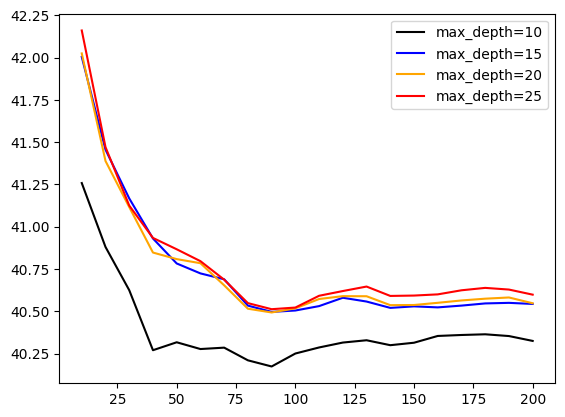

In [46]:
colors = ['black', 'blue', 'orange', 'red']
values = [10,15,20,25]

for s, col in zip(values, colors):
    df_subset = df_param[df_param.m_depth == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='max_depth=%d' % s)

plt.legend()

What's the best max_depth, using the mean RMSE?

* 10   # answer
* 15
* 20
* 25

#### Question 5
We can extract feature importance information from tree-based models.  

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split.    
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.  

For this homework question, we'll find the most important feature:  
*  
*  Train the model with these parameters:
*  n_estimators=10,
*  max_depth=20,
*  random_state=1,
*  n_jobs=-1 (optional)
*  Get the feature importance information from this model

In [47]:
rf=RandomForestRegressor(n_estimators=10,max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [48]:
# Get feature importances
importances = rf.feature_importances_
feature_names=dv.get_feature_names_out()

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [49]:
len(dv.get_feature_names_out())

29

In [50]:
# Sort by importance, in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df)

                             Feature  Importance
0               study_hours_per_week    0.248354
1                    attendance_rate    0.149729
2                 distance_to_school    0.136486
3                    teacher_quality    0.082682
4                                age    0.069311
5              assignments_completed    0.031517
6          socioeconomic_status=High    0.025714
7            parent_involvement=High    0.022919
8                  it_knowledge=High    0.017719
9   parent_education_level=Secondary    0.016957
10    parent_education_level=Primary    0.015450
11   parent_education_level=Tertiary    0.014489
12                extra_tutorials=No    0.013459
13            parent_involvement=Low    0.013358
14                  it_knowledge=Low    0.012404
15   access_to_learning_materials=No    0.012325
16         parent_involvement=Medium    0.011492
17          socioeconomic_status=Low    0.010708
18       socioeconomic_status=Medium    0.010563
19                  

What's the most important feature (among these 4)?

* study_hours_per_week   <- answer
* attendance_rate
* distance_to_school
* teacher_quality

#### Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:  

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

In [51]:
!conda activate ml_study

In [52]:
import xgboost as xgb
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)



In [132]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [133]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
     'eval_metric':'rmse',
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [134]:
s.strip().split('\n')[-1]

'[99]\ttrain-rmse:23.59704\tval-rmse:41.05034'

In [135]:
y_pred=model.predict(dval)
rmse=np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(43.418817345871766)

In [156]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric':'rmse',
    
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=100 ,evals=watchlist)




In [157]:
#scores={}

In [158]:
key='eta=%s' %(xgb_params['eta'])
scores[key]= parse_xgb_output(output)
scores.keys()

dict_keys(['eta=1.0', 'eta=0.9', 'eta=0.7', 'eta=0.5', 'eta=0.3', 'eta=0.1'])

In [159]:
#del scores['']

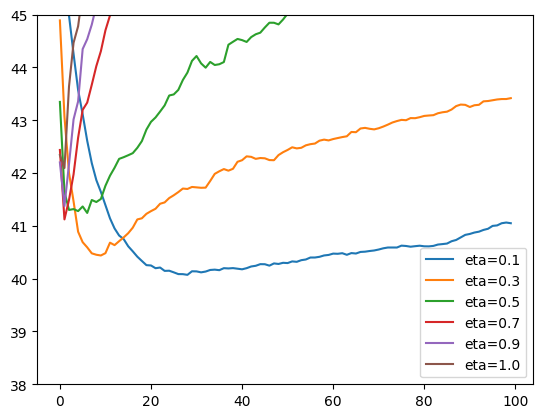

In [164]:
etas=['eta=0.1','eta=0.3', 'eta=0.5','eta=0.7', 'eta=0.9', 'eta=1.0']
for eta in etas:
    df_score=scores[eta] 
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.ylim(38, 45)
plt.legend();

##### Now change eta from 0.3 to 0.1.



Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1  <= answer
* Both give equal value

In [165]:
# eta of 0.1 is best

In [200]:
scores={}

In [205]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric':'rmse',
    
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=300 ,evals=watchlist)


In [206]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=1', 'max_depth=2', 'max_depth=3'])

In [207]:
#del scores[]

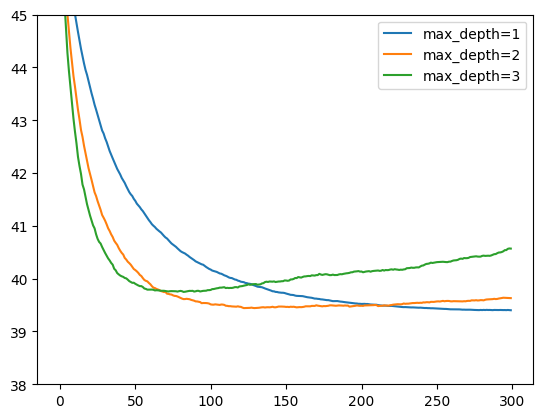

In [208]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

plt.ylim(38, 45)
plt.legend();

In [211]:
scores['max_depth=1']['val_rmse'].tail(1)

299    39.40233
Name: val_rmse, dtype: float64